In [1]:
import pandas as pd
import config as c
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess

In [2]:
data = pd.read_csv('data/runs/results.csv', index_col='run')

In [3]:
data = data[data['status']!='error']
data = data[data['r_2_mean'].notnull()]

In [4]:
data['time'] = pd.to_timedelta(data['time'])
data['started'] = pd.to_datetime(data['started'])

In [5]:
data['seconds'] = data['time'].apply(lambda x:x.seconds)

In [6]:
data['datasets'] = data['gdsc']+data['ctrp']+data['ccle']

In [7]:
data = data[data['datasets']>0]

In [8]:
ndata = data[data['started'] > pd.to_datetime('2020-04-15 18:00:00')]

In [9]:
data[(data['datasets']>1)&(data['feda'] == True)].describe()

,time,cutoff,drugs,n,test,threshold,step,r_2_mean,r_2_std,seconds
count,372,372.0,372.000000,369.000000,0.0,372.000000,372.0,372.000000,372.000000,372.000000
mean,0 days 01:33:10.572580,4.0,20.438172,0.095820,NaN,0.010349,0.0,-0.032297,0.038401,5358.314516
std,0 days 02:25:35.038378,0.0,3.891236,0.060366,NaN,0.005101,0.0,0.040100,0.074324,7116.543587
min,0 days 00:01:02,4.0,3.000000,0.000000,NaN,0.010000,0.0,-0.246424,0.001156,62.000000
25%,0 days 00:22:36,4.0,20.000000,0.043906,NaN,0.010000,0.0,-0.050743,0.007934,1356.000000
50%,0 days 00:55:12,4.0,20.000000,0.091081,NaN,0.010000,0.0,-0.010981,0.014454,3312.000000
75%,0 days 01:45:48,4.0,20.000000,0.143865,NaN,0.010000,0.0,-0.005298,0.040704,6348.000000
max,1 days 04:49:17,4.0,50.000000,0.245415,NaN,0.100000,0.0,0.000176,0.792094,62196.000000


In [10]:
data.describe()

,time,cutoff,drugs,n,test,threshold,step,r_2_mean,r_2_std,seconds
count,1575,1576.0,1576.000000,1567.000000,0.0,1576.000000,1576.0,1576.000000,1574.000000,1575.000000
mean,0 days 00:56:22.349841,4.0,21.153553,0.097956,NaN,0.010197,0.0,0.217790,0.267574,3327.492698
std,0 days 01:37:24.702631,0.0,5.957673,0.059263,NaN,0.004050,0.0,0.579085,1.920054,5280.215566
min,0 days 00:00:30,4.0,1.000000,0.000000,NaN,0.010000,0.0,-12.995511,0.000012,30.000000
25%,0 days 00:10:30,4.0,20.000000,0.048743,NaN,0.010000,0.0,-0.007908,0.019823,630.000000
50%,0 days 00:28:35,4.0,20.000000,0.092953,NaN,0.010000,0.0,0.113038,0.115819,1715.000000
75%,0 days 01:00:14,4.0,20.000000,0.145598,NaN,0.010000,0.0,0.322935,0.178392,3614.000000
max,1 days 04:49:17,4.0,50.000000,0.248831,NaN,0.100000,0.0,0.999979,58.519798,62196.000000


In [11]:
ndata.loc['df9f1d04']

operation                                          train:train
started                                    2020-04-20 12:48:24
time                                           0 days 00:02:40
status                                               completed
label        ccle=no ctrp=yes cutoff=4 drugs=20 feda=no fs=...
ccle                                                     False
ctrp                                                      True
cutoff                                                       4
drugs                                                       20
feda                                                     False
fs                                                f_regression
gdsc                                                      True
metric                                                AUC_IC50
model                                    RandomForestRegressor
n                                                    0.0396717
norm                                            Standar

In [12]:
ndata[ndata['norm'].notnull()].sort_values('r_2_mean', ascending=False)

,operation,started,time,status,label,ccle,ctrp,cutoff,drugs,feda,...,model,n,norm,test,threshold,step,r_2_mean,r_2_std,seconds,datasets
run,,,,,,,,,,,,,,,,,,,,,
678f9d02,train:train,2020-04-20 14:38:41,02:23:17,completed,ccle=no ctrp=yes cutoff=4 drugs=20 feda=no fs=...,False,True,4.0,20.0,False,...,RandomForestRegressor,0.141642,QuantileTransformer,NaN,0.01,0.0,0.394109,0.218128,8597.0,2
c817d1c1,train:train,2020-04-20 21:54:10,01:31:26,completed,ccle=no ctrp=yes cutoff=4 drugs=20 feda=no fs=...,False,True,4.0,20.0,False,...,SVR,0.061395,QuantileTransformer,NaN,0.01,0.0,0.391546,0.176993,5486.0,2
26277a7c,train:train,2020-04-21 00:35:03,02:27:52,completed,ccle=no ctrp=yes cutoff=4 drugs=20 feda=no fs=...,False,True,4.0,20.0,False,...,SVR,0.010026,MinMaxScaler,NaN,0.01,0.0,0.323529,0.250833,8872.0,2
e0df41ff,train:train,2020-04-20 19:01:29,00:07:39,completed,ccle=no ctrp=yes cutoff=4 drugs=20 feda=no fs=...,False,True,4.0,20.0,False,...,KNeighborsRegressor,0.078955,StandardScaler,NaN,0.01,0.0,0.316827,0.163746,459.0,2
df9f1d04,train:train,2020-04-20 12:48:24,00:02:40,completed,ccle=no ctrp=yes cutoff=4 drugs=20 feda=no fs=...,False,True,4.0,20.0,False,...,RandomForestRegressor,0.039672,StandardScaler,NaN,0.01,0.0,0.315154,0.251800,160.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
076c3815,train:train,2020-04-20 19:41:27,00:32:06,completed,ccle=no ctrp=yes cutoff=4 drugs=20 feda=no fs=...,False,True,4.0,20.0,False,...,DecisionTreeRegressor,0.190056,QuantileTransformer,NaN,0.01,0.0,-0.463181,1.171484,1926.0,1
e3c5e095,train:train,2020-04-20 13:44:10,00:32:42,completed,ccle=no ctrp=yes cutoff=4 drugs=20 feda=no fs=...,False,True,4.0,20.0,False,...,DecisionTreeRegressor,0.070644,MaxAbsScaler,NaN,0.01,0.0,-0.481483,1.023558,1962.0,1
aecf4a6a,train:train,2020-04-20 13:16:13,00:17:37,completed,ccle=no ctrp=yes cutoff=4 drugs=20 feda=yes fs...,False,True,4.0,20.0,True,...,DecisionTreeRegressor,0.162714,MaxAbsScaler,NaN,0.01,0.0,-0.584404,0.589324,1057.0,1


## FEDA t-test

In [13]:
data[data['fs']=='Lasso'][['model', 'feda','r_2_mean']]

,model,feda,r_2_mean
run,,,
acbbf2bd,KNeighborsRegressor,True,0.026389
ddc1fcee,ElasticNet,False,0.212919
f15866de,ElasticNet,False,0.038551
9fe7654e,DecisionTreeRegressor,True,-0.183967
5e7b5693,DecisionTreeRegressor,True,-0.342574
...,...,...,...
ec5e4047,DecisionTreeRegressor,False,0.999100
81ec90e7,DecisionTreeRegressor,False,0.999535
dde14bbd,DecisionTreeRegressor,False,0.999529


In [280]:
ndata[(ndata['feda']==False)&(~ndata['model'].isin(['SVR', 'ElasticNet']))]['r_2_mean'].mean()

0.11587292792107694

In [279]:
ndata[(ndata['feda']==True)&(~ndata['model'].isin(['SVR', 'ElasticNet']))]['r_2_mean'].mean()

-0.0038146281337004995

In [24]:
from scipy import stats
stats.ttest_ind(data[data['metric']=='AUC_IC50']['r_2_mean'].values, data[data['metric']!='AUC_IC50']['r_2_mean'].values)

Ttest_indResult(statistic=-0.3913970844859045, pvalue=0.6955567243773826)

In [270]:
stats.ttest_ind(ndata[ndata['feda']==True]['r_2_mean'].values, ndata[ndata['feda']==False]['r_2_mean'].values, equal_var=False)

Ttest_indResult(statistic=-9.375550795860045, pvalue=5.019565164007916e-19)

## Model composition

In [14]:
models = data.groupby('model').mean()
models['Number of runs'] = [data[data['model']==i].shape[0] for i in models.index]
models

,cutoff,drugs,n,test,threshold,step,r_2_mean,r_2_std,seconds,Number of runs
model,,,,,,,,,,
DecisionTreeRegressor,4.0,19.881620,0.098228,NaN,0.010000,0.0,0.311072,0.156245,2213.277259,321
ElasticNet,4.0,20.000000,0.096531,NaN,0.010000,0.0,0.136420,0.115252,2000.168807,545
KNeighborsRegressor,4.0,20.000000,0.095007,NaN,0.010000,0.0,0.134092,0.095341,11269.944444,126
RandomForestRegressor,4.0,19.944444,0.096458,NaN,0.010000,0.0,0.438635,0.068595,4276.065359,306
SVR,4.0,26.737410,0.103601,NaN,0.011115,0.0,0.064450,0.991022,2569.523466,278


In [15]:
nmodels = data[data['started'] > pd.to_datetime('2020-04-15 18:00:00')].groupby('model').mean()
nmodels['Number of runs'] = [data[(data['model']==i) & (data['started'] > pd.to_datetime('2020-04-15 18:00:00'))].shape[0] for i in nmodels.index]
nmodels

,cutoff,drugs,n,test,threshold,step,r_2_mean,r_2_std,seconds,Number of runs
model,,,,,,,,,,
DecisionTreeRegressor,4.0,19.874172,0.096281,NaN,0.01,0.0,-0.081740,0.274794,2341.556291,151
ElasticNet,4.0,20.000000,0.091810,NaN,0.01,0.0,0.102337,0.100934,2468.429319,191
KNeighborsRegressor,4.0,20.000000,0.099026,NaN,0.01,0.0,0.092480,0.100040,12732.747573,103
RandomForestRegressor,4.0,20.000000,0.087966,NaN,0.01,0.0,0.122926,0.110166,4267.981013,158
SVR,4.0,20.000000,0.053087,NaN,0.01,0.0,-0.117280,0.772632,3968.034091,88


In [52]:
norm = ndata.groupby(['model', 'norm']).max()
norm['Number of runs'] = [ndata[(ndata['model']==i[0])&(ndata['norm']==i[1])].shape[0] for i in norm.index]

In [54]:
norm.loc['SVR', 'QuantileTransformer']

operation                                               train:train
started                                         2020-04-20 21:54:10
time                                                0 days 01:31:26
status                                                    completed
label             ccle=yes ctrp=yes cutoff=4 drugs=20 feda=no fs...
ccle                                                           True
ctrp                                                           True
cutoff                                                            4
drugs                                                            20
feda                                                           True
fs                                           mutual_info_regression
gdsc                                                           True
metric                                                     AUC_IC50
n                                                         0.0802049
test                                            

In [25]:
stats.ttest_ind(ndata[ndata['norm'].notnull()]['r_2_mean'].values, ndata[~ndata['norm'].notnull()]['r_2_mean'].values, equal_var=False)

Ttest_indResult(statistic=-1.8743103650682442, pvalue=0.062111994287563865)

## Per model

In [283]:
ndata[(ndata['feda']==True)&(ndata['datasets']>1)].sort_values('r_2_mean', ascending=False)

,operation,started,time,status,label,ccle,ctrp,cutoff,drugs,feda,...,model,n,norm,test,threshold,step,r_2_mean,r_2_std,seconds,datasets
run,,,,,,,,,,,,,,,,,,,,,
0d238804,train:train,2020-04-16 05:51:03,01:40:36,completed,ccle=yes ctrp=yes cutoff=4 drugs=20 feda=yes f...,True,True,4.0,20.0,True,...,ElasticNet,0.159352,NaN,NaN,0.01,0.0,-0.001914,0.001383,6036.0,3
51241a74,train:train,2020-04-17 02:59:27,00:15:25,completed,ccle=yes ctrp=yes cutoff=4 drugs=20 feda=yes f...,True,True,4.0,20.0,True,...,ElasticNet,0.031760,NaN,NaN,0.01,0.0,-0.002197,0.002287,925.0,2
0b35dc5d,train:train,2020-04-16 04:46:41,01:41:16,completed,ccle=yes ctrp=yes cutoff=4 drugs=20 feda=yes f...,True,True,4.0,20.0,True,...,ElasticNet,0.129060,NaN,NaN,0.01,0.0,-0.002357,0.002823,6076.0,2
5ff47509,train:train,2020-04-16 01:48:47,01:05:08,completed,ccle=yes ctrp=no cutoff=4 drugs=20 feda=yes fs...,True,False,4.0,20.0,True,...,ElasticNet,0.120254,NaN,NaN,0.01,0.0,-0.002631,0.002777,3908.0,2
a2001ef9,train:train,2020-04-16 05:06:57,03:58:31,completed,ccle=no ctrp=yes cutoff=4 drugs=20 feda=yes fs...,False,True,4.0,20.0,True,...,RandomForestRegressor,0.160064,NaN,NaN,0.01,0.0,-0.003089,0.007976,14311.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7cca510a,train:train,2020-04-18 13:07:13,00:44:52,completed,ccle=yes ctrp=yes cutoff=4 drugs=20 feda=yes f...,True,True,4.0,20.0,True,...,SVR,0.023019,NaN,NaN,0.01,0.0,-0.142764,0.272121,2692.0,2
26d60d3b,train:train,2020-04-19 17:20:57,00:48:47,completed,ccle=yes ctrp=yes cutoff=4 drugs=20 feda=yes f...,True,True,4.0,20.0,True,...,DecisionTreeRegressor,0.009347,NaN,NaN,0.01,0.0,-0.146341,0.282566,2927.0,2
9e0cc091,train:train,2020-04-19 17:56:20,02:35:00,completed,ccle=yes ctrp=no cutoff=4 drugs=20 feda=yes fs...,True,False,4.0,20.0,True,...,DecisionTreeRegressor,0.172456,NaN,NaN,0.01,0.0,-0.148571,0.111783,9300.0,2


In [285]:
ndata.loc['51241a74']['label']

'ccle=yes ctrp=yes cutoff=4 drugs=20 feda=yes fs=Lasso gdsc=no metric=AUC_IC50 model=ElasticNet n=0.03176 threshold=0.01'

## Individual drug analysis

In [121]:
svr = data[(data['model'] == 'SVR') & (data['r_2_mean']>0)]
svr[svr['r_2_mean']> 0.6][['feda', 'n', 'fs','r_2_mean']].sort_values('r_2_mean', ascending=False)

,feda,n,fs,r_2_mean
run,,,,
c84c194d,False,0.010000,ElasticNet,0.934915
8071f94a,False,0.094795,DecisionTreeRegressor,0.922619
400d39b7,False,0.098271,DecisionTreeRegressor,0.922580
d2703cd1,False,0.147682,mutual_info_regression,0.919401
dfde6ba7,False,0.072084,mutual_info_regression,0.917935
c889fa24,False,0.087590,f_regression,0.916772
b1cea166,False,0.003354,mutual_info_regression,0.901983
e32273a7,False,0.144099,ElasticNet,0.897122
9cabe208,False,0.057282,RandomForestRegressor,0.887763


In [122]:
en = data[(data['model'] == 'ElasticNet') & (data['r_2_mean']>0)]
en[['feda', 'n', 'fs','r_2_mean']].sort_values('r_2_mean', ascending=False)

,feda,n,fs,r_2_mean
run,,,,
150587db,False,0.100081,mutual_info_regression,0.541867
140511c0,False,0.006392,DecisionTreeRegressor,0.502989
61f79f6a,False,0.146809,DecisionTreeRegressor,0.499752
a0fd39fd,False,0.161861,DecisionTreeRegressor,0.479983
d122f81c,True,0.002680,DecisionTreeRegressor,0.445192
...,...,...,...,...
ae6aad99,True,0.083612,f_regression,0.030006
30aec5a1,True,0.172041,mutual_info_regression,0.029708
c7025afd,False,0.025666,RandomForestRegressor,0.021164


In [123]:
dt = data[(data['model'] == 'DecisionTreeRegressor') & (data['r_2_mean']>0)]
dt[['feda', 'n', 'fs','r_2_mean']].sort_values('r_2_mean', ascending=False)

,feda,n,fs,r_2_mean
run,,,,
bb21f1a1,False,0.178835,Lasso,0.999979
ffb505bc,False,0.029654,Lasso,0.999978
8ee1461e,False,0.000266,Lasso,0.999976
62069de6,False,0.132054,Lasso,0.999972
43650dda,False,0.073360,Lasso,0.999966
...,...,...,...,...
25e24ad2,False,0.117603,RandomForestRegressor,0.110713
b54c0127,False,0.109115,ElasticNet,0.100940
1ea7b30d,False,0.018304,ElasticNet,0.056617


In [326]:
def append(data, run):
    history = pd.read_csv('data/runs/drug_data.csv')
    result = pd.DataFrame()
    for a in run:
        if a not in history['run'].values:
            f = subprocess.run("guild select " +a, shell=True, capture_output=True)
            d = pd.read_csv('venv/.guild/runs/'+f.stdout.decode('utf-8')[:-1]+'/scores.csv')
            d['run'] = [a for i in range(0, d.shape[0])]
            d = d.set_index('run')
            result = pd.concat([result, d])
            
    return result

In [327]:
%%time
k = append(ndata, ndata.index)

CPU times: user 4.57 s, sys: 1.38 s, total: 5.95 s
Wall time: 28min 18s


In [328]:
no = pd.read_csv('data/runs/drug_data.csv')
lo = pd.concat([no, k])

In [329]:
lo

,run,Unnamed: 0,r2_score,mean_absolute_error,mean_squared_error,median_absolute_error,algorithm,leaf_size,metric,metric_params,...,oob_score,verbose,C,cache_size,coef0,degree,epsilon,gamma,kernel,shrinking
0,46efb220,17-AAG,0.048576,0.182631,0.050794,0.160040,ball_tree,30.0,minkowski,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,46efb220,Crizotinib,-0.054589,0.318273,0.120567,0.345793,kd_tree,30.0,minkowski,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,46efb220,Erlotinib,0.054720,0.163415,0.044111,0.138618,ball_tree,30.0,minkowski,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,46efb220,L-685458,0.024931,0.104633,0.025981,0.070908,kd_tree,30.0,minkowski,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,46efb220,Lapatinib,0.003609,0.186385,0.054420,0.165393,kd_tree,30.0,minkowski,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a7babea5,NaN,Rapamycin,-0.000289,0.164093,0.041508,0.137052,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a7babea5,NaN,Sorafenib,0.196351,0.183656,0.053706,0.154738,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a7babea5,NaN,Tipifarnib,-0.104877,0.179970,0.050927,0.152824,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a7babea5,NaN,VX-680,-0.203485,0.230718,0.082794,0.166187,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
no = pd.read_csv('data/runs/drug_data.csv')
no = no.join(ndata, rsuffix='_drug')

,run,Unnamed: 0,r2_score,mean_absolute_error,mean_squared_error,median_absolute_error,algorithm,leaf_size,metric,metric_params,...,model,n,norm,test,threshold,step,r_2_mean,r_2_std,seconds,datasets
0,46efb220,17-AAG,0.048576,0.182631,0.050794,0.160040,ball_tree,30.0,minkowski,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,46efb220,Crizotinib,-0.054589,0.318273,0.120567,0.345793,kd_tree,30.0,minkowski,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,46efb220,Erlotinib,0.054720,0.163415,0.044111,0.138618,ball_tree,30.0,minkowski,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,46efb220,L-685458,0.024931,0.104633,0.025981,0.070908,kd_tree,30.0,minkowski,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,46efb220,Lapatinib,0.003609,0.186385,0.054420,0.165393,kd_tree,30.0,minkowski,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5070,30f1586e,Paclitaxel,0.417166,0.177412,0.056626,0.123328,ball_tree,30.0,minkowski,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5071,30f1586e,Saracatinib,0.166791,0.143612,0.033232,0.113486,ball_tree,30.0,minkowski,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5072,30f1586e,Selumetinib,0.290452,0.147707,0.038296,0.112335,kd_tree,30.0,minkowski,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5073,30f1586e,Sorafenib,0.103364,0.112843,0.022993,0.078590,ball_tree,30.0,minkowski,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Influence of n on r2 mean
By changing `col` and `hue` to 'fs' one can see the impact depending on the feature selection model use

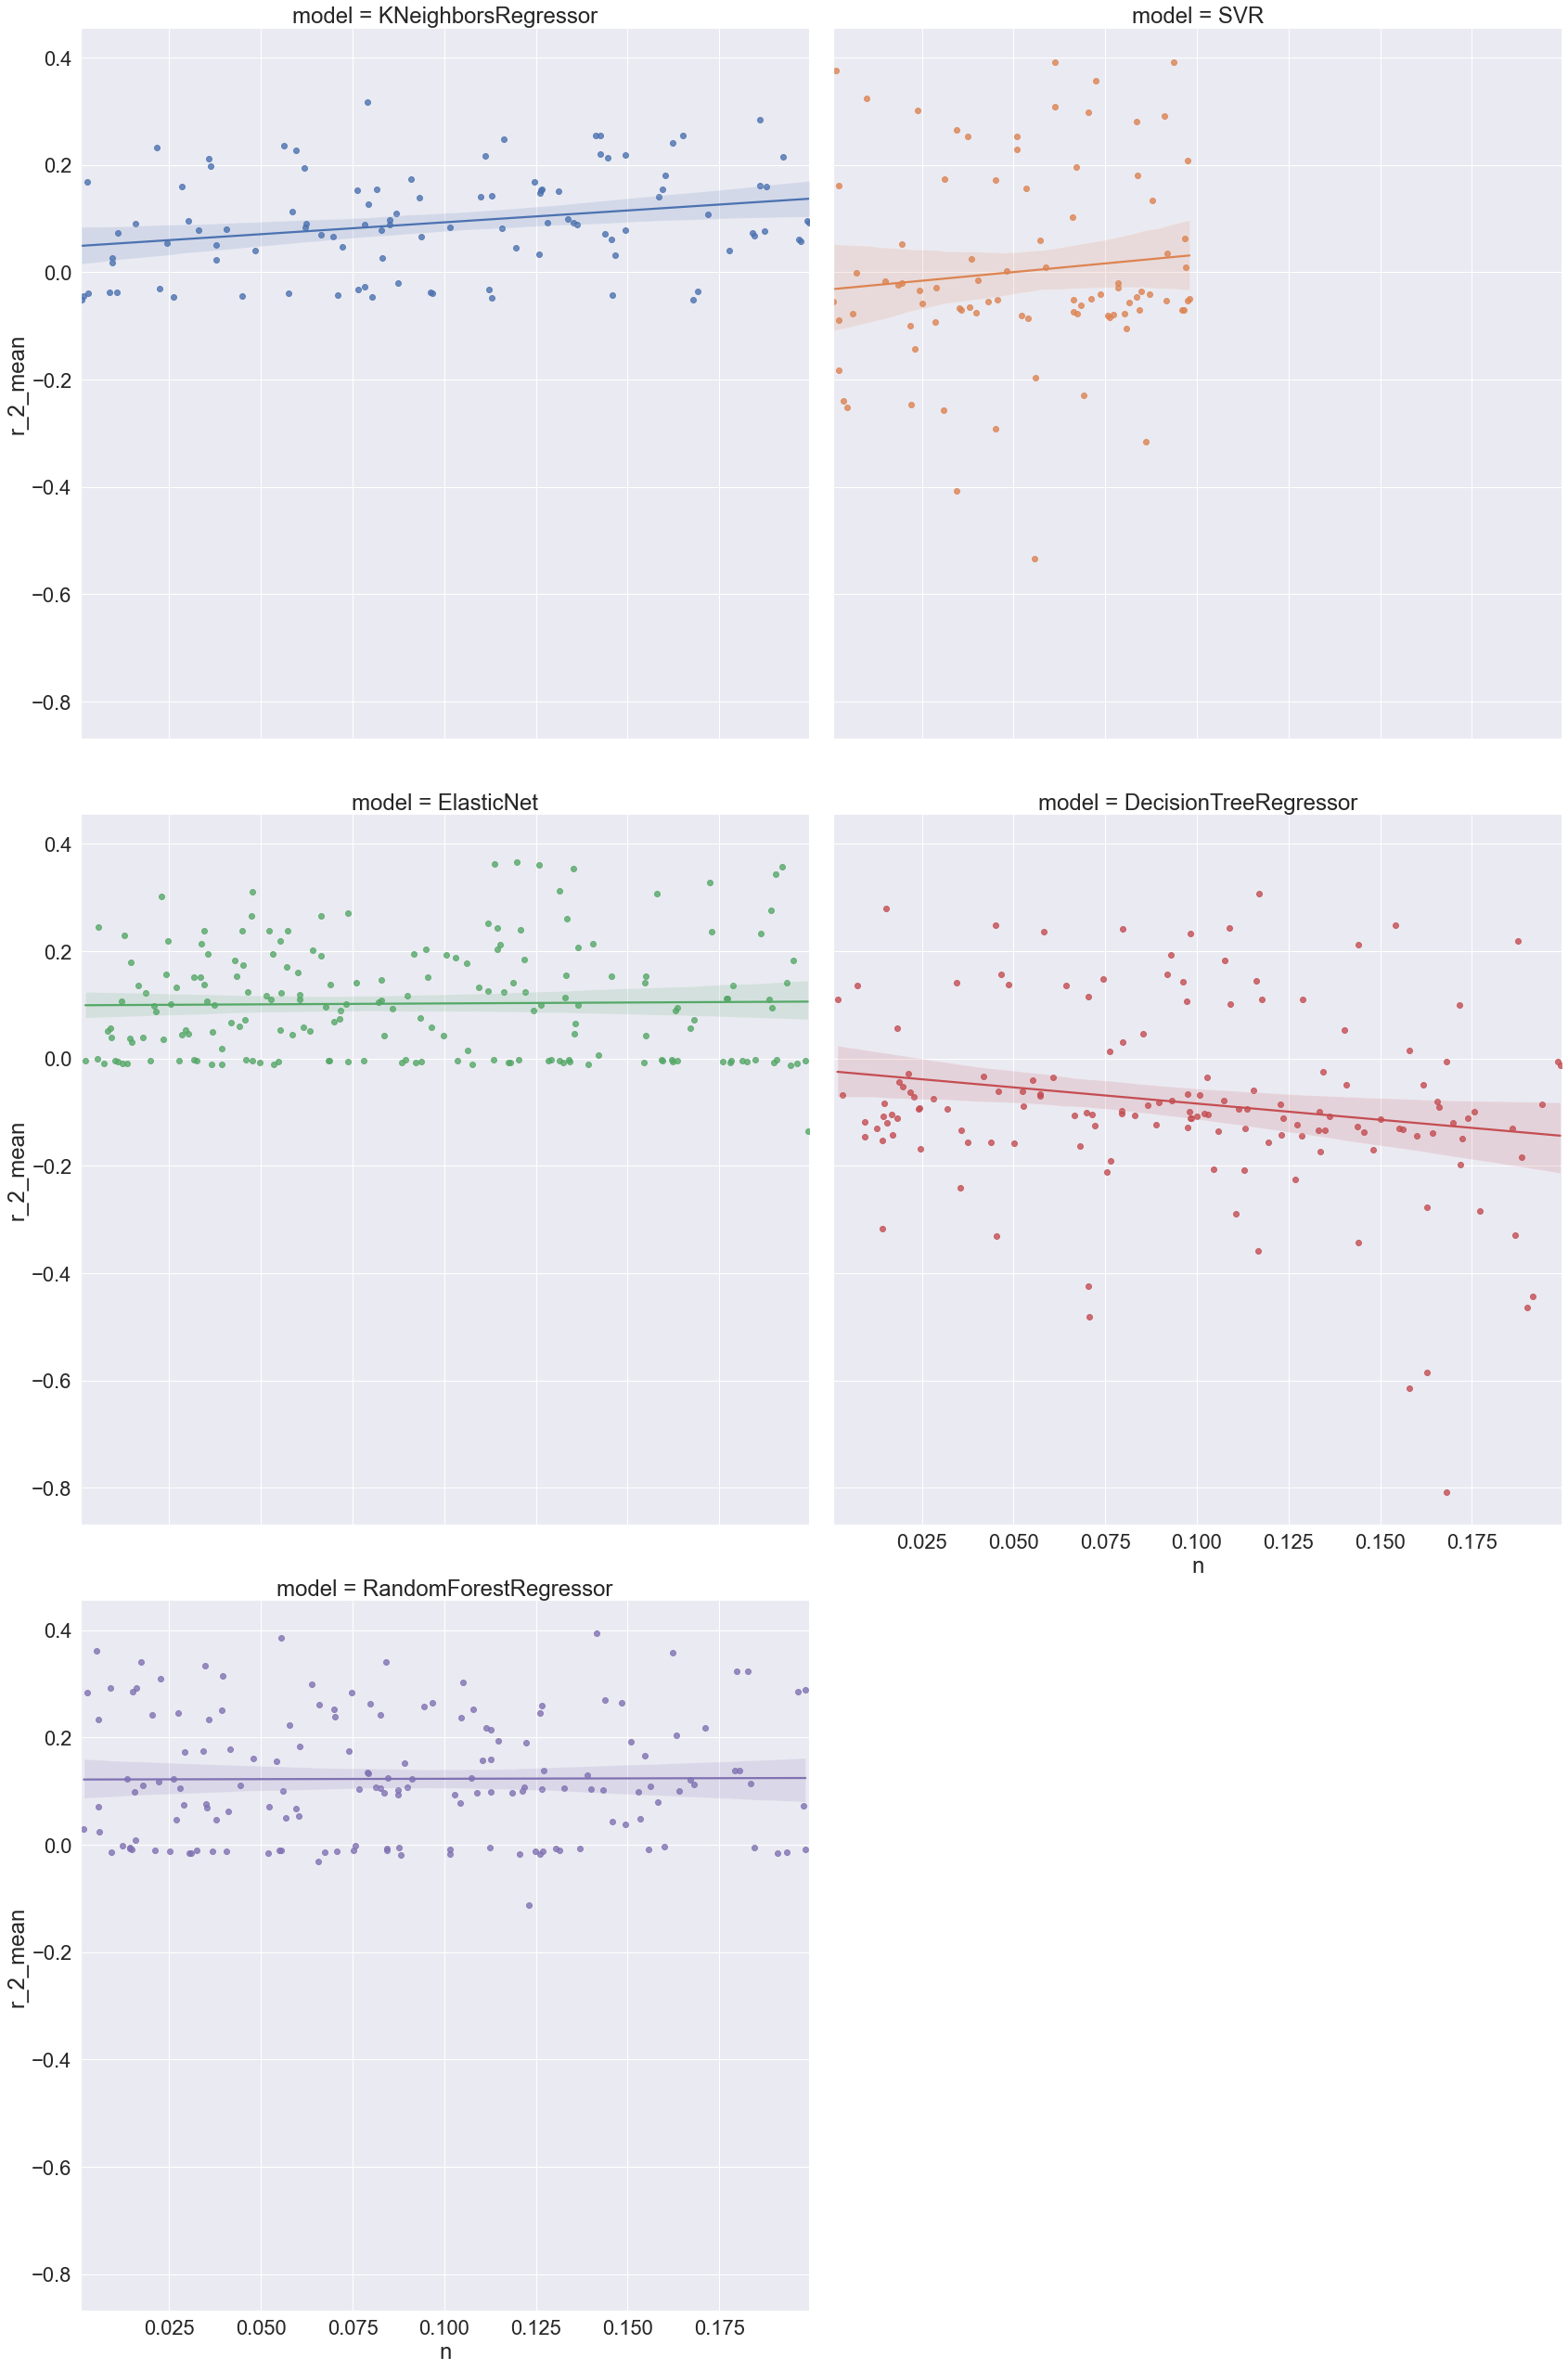

In [151]:
sns.set(font_scale=2)
g = sns.lmplot(x='n', y='r_2_mean', data=ndata[ndata['r_2_mean']>-10], col='model', hue='model', col_wrap=2, height=12, legend=False)
plt.savefig('model vs n')

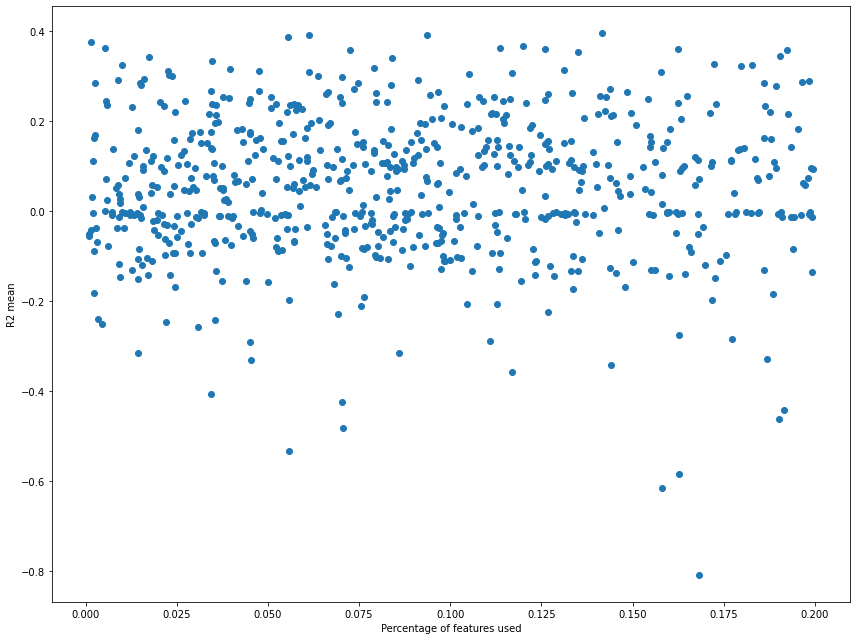

In [104]:
fig, ax = plt.subplots(figsize = (12,9))
ax.scatter(ndata[ndata['r_2_mean']>-10]['n'], ndata[ndata['r_2_mean']>-10]['r_2_mean'])
ax.set_xlabel('Percentage of features used')
ax.set_ylabel('R2 mean')
plt.tight_layout()
plt.savefig('Features vs r2')

## Violinplots of r2 per model and per Drug (using the top-10 most common)

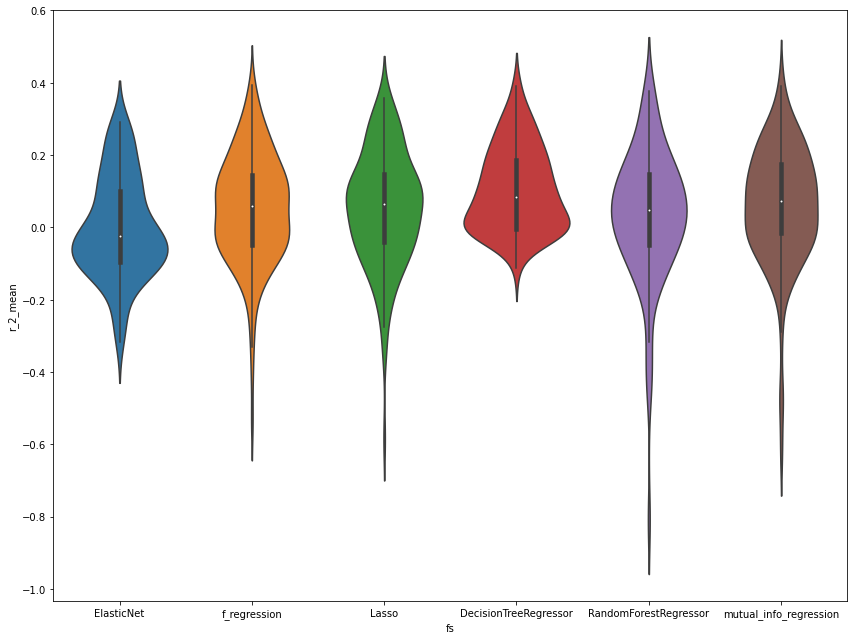

In [88]:
plt.figure(figsize = (12,9))
ax = sns.violinplot(x=ndata[ndata['r_2_mean']>-10]['fs'], y = ndata['r_2_mean'])
plt.tight_layout()
plt.savefig('model.png')

In [ ]:
from collections import Counter
count = Counter(no['Unnamed: 0'])

def getDrugs(n):
    return [i[0] for i in count.most_common(n)]

In [ ]:
jo = no[no['Unnamed: 0'].isin(getDrugs(10))]

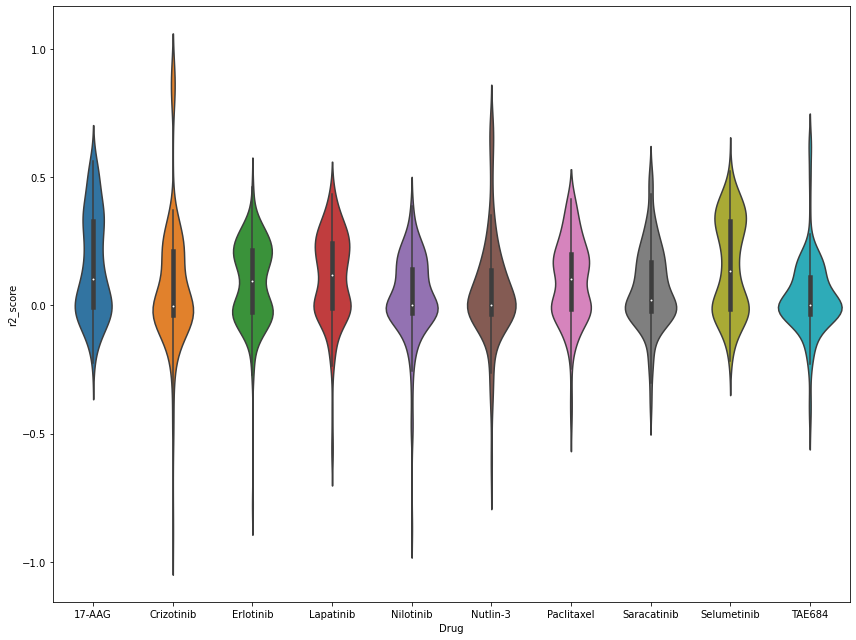

In [86]:
plt.figure(figsize = (12,9))
ax = sns.violinplot(x=jo['Unnamed: 0'], y = jo['r2_score'])
ax.set_xlabel('Drug')
plt.tight_layout()
plt.savefig('drugs.png')

In [187]:
lo = k.join(ndata, lsuffix='n')

In [78]:
lo.groupby('model').mean()

,r2_score,mean_absolute_error,mean_squared_error,median_absolute_error,alpha,l1_ratio,max_iter,random_state,tol,max_depth,...,epsilon,cutoff,drugs,n,test,threshold,step,r_2_mean,r_2_std,seconds
model,,,,,,,,,,,,,,,,,,,,,
DecisionTreeRegressor,-0.094432,0.165591,0.049621,0.138739,NaN,NaN,NaN,NaN,NaN,2.518900,...,NaN,4.0,20.0,0.090949,NaN,0.01,0.0,-0.094432,0.338541,3467.963918
ElasticNet,0.109282,0.152390,0.040928,0.135200,2.924088,0.108212,5000.0,NaN,0.0001,NaN,...,NaN,4.0,20.0,0.092379,NaN,0.01,0.0,0.109282,0.121841,2296.259854
KNeighborsRegressor,0.068197,0.152170,0.042126,0.131089,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,20.0,0.094594,NaN,0.01,0.0,0.068197,0.107072,10402.251889
RandomForestRegressor,0.108255,0.161446,0.044138,0.143393,NaN,NaN,NaN,NaN,NaN,4.345299,...,NaN,4.0,20.0,0.079032,NaN,0.01,0.0,0.108255,0.092693,4008.966154
SVR,0.015268,0.160099,0.044577,0.137407,NaN,NaN,-1.0,NaN,0.0010,NaN,...,0.1,4.0,20.0,0.067049,NaN,0.01,0.0,0.015268,0.295948,1913.851003
